<a href="https://colab.research.google.com/github/saranya282/leaf-disease-detection-using-ml/blob/main/leaf_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saisaranyamallu","key":"5ac2d38414239f1107027e258d274052"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d emmarex/plantdisease

100% 655M/658M [00:05<00:00, 112MB/s]
100% 658M/658M [00:05<00:00, 119MB/s]


In [6]:
! unzip plantdisease.zip && rm plantdisease.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

In [7]:

import numpy as np # linear algebra
import pandas as pd # data processing, 
import os


In [9]:
os.listdir('/content/PlantVillage')

['Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Potato___Late_blight',
 'Tomato_Bacterial_spot',
 'Pepper__bell___healthy',
 'Tomato_Leaf_Mold',
 'Tomato__Tomato_mosaic_virus',
 'Potato___healthy',
 'Tomato_Septoria_leaf_spot',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Potato___Early_blight',
 'Pepper__bell___Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot']

In [10]:

len(os.listdir('/content/PlantVillage'))

15

In [11]:
list_diseases = os.listdir('/content/PlantVillage')

In [12]:
len(os.listdir("/content/PlantVillage/Potato___healthy"))

152

In [15]:
results2 = []
for disease in list_diseases:
    dies_name_count = {}
    count_disease = len(os.listdir(f'/content/PlantVillage/{disease}'))
    dies_name_count['disease'] = disease
    dies_name_count['count_images'] = count_disease
    results2.append(dies_name_count)

In [16]:
results = pd.DataFrame(results2)
results

,disease,count_images
0,Tomato__Tomato_YellowLeaf__Curl_Virus,3209
1,Potato___Late_blight,1000
2,Tomato_Bacterial_spot,2127
3,Pepper__bell___healthy,1478
4,Tomato_Leaf_Mold,952
5,Tomato__Tomato_mosaic_virus,373
6,Potato___healthy,152
7,Tomato_Septoria_leaf_spot,1771
8,Tomato_healthy,1591
9,Tomato_Late_blight,1909


In [17]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

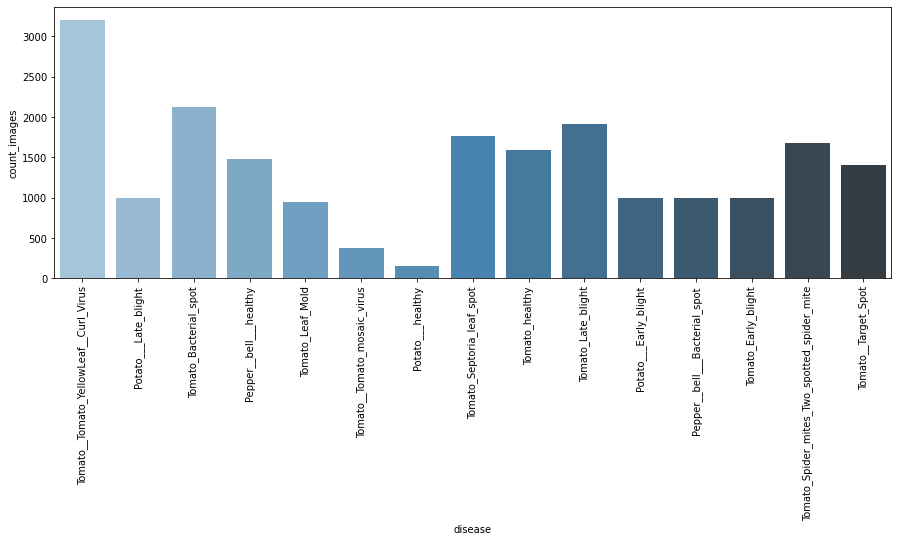

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x='disease', y = 'count_images', data= results, palette='Blues_d')
plt.xticks(rotation=90)
plt.show()

In [19]:
# need to add each category count
tomato_diseases, pepper_diseases, potato_diseases = [], [],[]
for disease in list_diseases:
    if 'Tomato' in disease:
        tomato_diseases.append(disease)
    if 'Pepper' in disease:
        pepper_diseases.append(disease)
    if 'Potato' in disease:
        potato_diseases.append(disease)

In [21]:
total_t_count = 0
for t_d in tomato_diseases:
    t_disease_count = len(os.listdir(f'/content/PlantVillage/{t_d}'))
    total_t_count += t_disease_count

In [22]:
# total tomato count
total_t_count

16012

In [23]:
total_p_count = 0
for t_p in pepper_diseases:
    p_disease_count = len(os.listdir(f'/content/PlantVillage/{t_p}'))
    total_p_count += p_disease_count
# total pepper Count
total_p_count

2475

In [24]:
total_po_count = 0
for t_po in potato_diseases:
    po_disease_count = len(os.listdir(f'/content/PlantVillage/{t_po}'))
    total_po_count += po_disease_count
# total potato Count
total_po_count

2152

In [25]:
ind_count = pd.DataFrame([{'Category':'Pepper','Count':total_p_count},
{'Category':'Potato','Count':total_po_count},
{'Category':'Tomato','Count':total_t_count}])


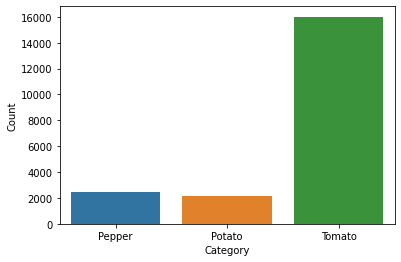

In [26]:
sns.barplot(x='Category', y = 'Count', data=ind_count)
plt.show()

In [28]:
os.listdir('/content/PlantVillage/Tomato_Leaf_Mold')[100]

'acfa0062-84e4-4b59-a886-6ff31a81230f___Crnl_L.Mold 7007.JPG'

In [29]:
from PIL import Image
fol_path = '/content/PlantVillage'
cat_list = []
images_list = []
for t_c in tomato_diseases:
    dir_path = os.path.join(fol_path, t_c)
    img_path = os.listdir(dir_path)[0]
    cat_list.append(t_c)
    images_list.append(os.path.join(fol_path, t_c,img_path))

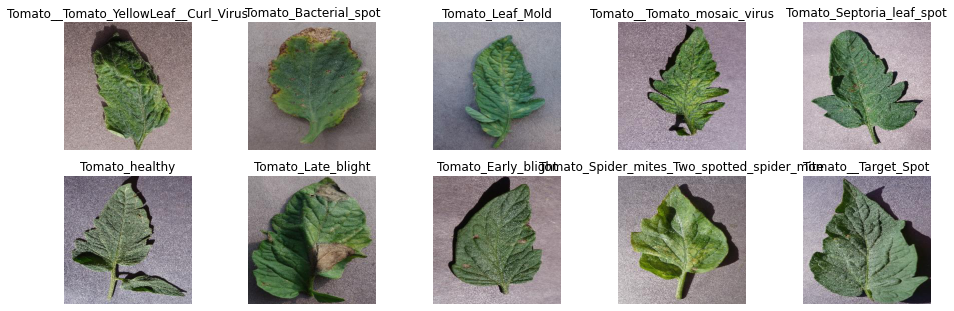

In [30]:
rows = 3
plt.figure(figsize=(16, 8)) 
for i,name in enumerate(cat_list):
    img = Image.open(images_list[i])
    plt.subplot(rows,5,i+1)
    plt.title(cat_list[i])
    plt.axis('off')
    plt.imshow(img)

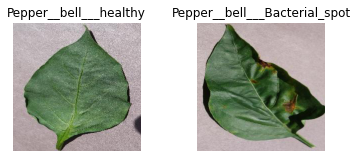

In [31]:
p_cat_list = []
p_images_list = []
for t_p in pepper_diseases:
    dir_path = os.path.join(fol_path, t_p)
    img_path = os.listdir(dir_path)[0]
    p_cat_list.append(t_p)
    p_images_list.append(os.path.join(fol_path, t_p,img_path))
    
rows = 3
plt.figure(figsize=(16, 8)) 
for i,name in enumerate(p_cat_list):
    img = Image.open(p_images_list[i])
    plt.subplot(rows,5,i+1)
    plt.title(p_cat_list[i])
    plt.axis('off')
    plt.imshow(img)

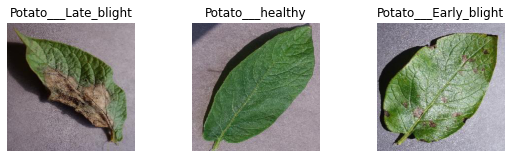

In [32]:
po_cat_list = []
po_images_list = []
for t_po in potato_diseases:
    dir_path = os.path.join(fol_path, t_po)
    img_path = os.listdir(dir_path)[0]
    po_cat_list.append(t_po)
    po_images_list.append(os.path.join(fol_path, t_po,img_path))
    
rows = 3
plt.figure(figsize=(16, 8)) 
for i,name in enumerate(po_cat_list):
    img = Image.open(po_images_list[i])
    plt.subplot(rows,5,i+1)
    plt.title(po_cat_list[i])
    plt.axis('off')
    plt.imshow(img)

In [33]:
# keras
# softmax--15
# Image Augmentation (rotate, )
# Fixed Dimension, 

In [35]:
labels = list(os.listdir("/content/PlantVillage"))

In [36]:
labels

['Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Potato___Late_blight',
 'Tomato_Bacterial_spot',
 'Pepper__bell___healthy',
 'Tomato_Leaf_Mold',
 'Tomato__Tomato_mosaic_virus',
 'Potato___healthy',
 'Tomato_Septoria_leaf_spot',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Potato___Early_blight',
 'Pepper__bell___Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot']

In [37]:
im_sh = Image.open('/content/PlantVillage/Tomato_Leaf_Mold/0db4cbf4-fa94-42c8-8bf5-90114281c569___Crnl_L.Mold 8681.JPG')

In [38]:
h,w = im_sh.size
print(h, w)

256 256


In [39]:
fol_path

'/content/PlantVillage'

In [40]:
os.listdir(fol_path)

['Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Potato___Late_blight',
 'Tomato_Bacterial_spot',
 'Pepper__bell___healthy',
 'Tomato_Leaf_Mold',
 'Tomato__Tomato_mosaic_virus',
 'Potato___healthy',
 'Tomato_Septoria_leaf_spot',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Potato___Early_blight',
 'Pepper__bell___Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot']

In [41]:
IMG_SIZE = 64
import cv2
training = []
for lb in labels:
    img_path = os.path.join(fol_path, lb)
    class_num = labels.index(lb)
    for img in os.listdir(img_path):
        try:
            img_array = cv2.imread(os.path.join(img_path, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training.append([new_array, class_num])
        except:
            continue

In [42]:
X, y = [], []
for features, label in training:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [43]:
X = X.astype('float32')
X /= 255
from keras.utils import np_utils
Y = np_utils.to_categorical(y, 15)
print(Y[100])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [44]:
Y[20000]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0,shuffle=True)

In [46]:
X_train.shape

(16510, 64, 64, 3)

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

In [48]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu',input_shape=(64,64,3)),
    MaxPooling2D((2,2),strides=2),
    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D((2,2),strides=2),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(15, activation='softmax')
    
])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [50]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.85):
            print("ur reached 90% accuracy")
            self.model.stop_training = True

In [52]:
callbacks = myCallBack()

In [53]:
history = model.fit(X_train, y_train, batch_size= 16, epochs=20, verbose=1, validation_data=(X_test, y_test),callbacks=[callbacks])

Epoch 1/20
1032/1032 [==============================] - 45s 43ms/step - loss: 1.4683 - accuracy: 0.5310 - val_loss: 0.9136 - val_accuracy: 0.7076
Epoch 2/20
1032/1032 [==============================] - 45s 44ms/step - loss: 0.8153 - accuracy: 0.7312 - val_loss: 0.7138 - val_accuracy: 0.7716
Epoch 3/20
1032/1032 [==============================] - 45s 44ms/step - loss: 0.6075 - accuracy: 0.7987 - val_loss: 0.5633 - val_accuracy: 0.8123
Epoch 4/20
1032/1032 [==============================] - 45s 44ms/step - loss: 0.4962 - accuracy: 0.8350 - val_loss: 0.5518 - val_accuracy: 0.8118
Epoch 5/20
1032/1032 [==============================] - 45s 44ms/step - loss: 0.4142 - accuracy: 0.8643 - val_loss: 0.4650 - val_accuracy: 0.8479
Epoch 6/20
1032/1032 [==============================] - 45s 44ms/step - loss: 0.3676 - accuracy: 0.8768 - val_loss: 0.5646 - val_accuracy: 0.8140
Epoch 7/20
1032/1032 [==============================] - 45s 44ms/step - loss: 0.3236 - accuracy: 0.8922 - val_loss: 0.4298 -

In [54]:
model.save('./plant_dieases_v1')

INFO:tensorflow:Assets written to: ./plant_dieases_v1/assets


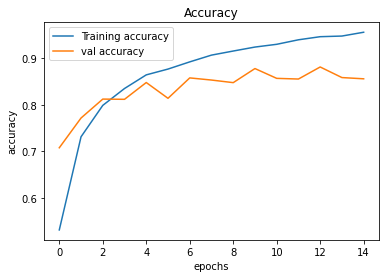

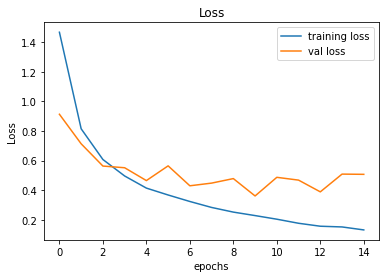

In [55]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [56]:
score = model.evaluate(X_test, y_test, verbose = 1)
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

129/129 [==============================] - 3s 24ms/step - loss: 0.5072 - accuracy: 0.8559
Test Score:  0.5072483420372009
Test accuracy:  0.8558623790740967


In [57]:
preds = np.round(model.predict(X_test),0)
print('Rounded test labels',preds)

Rounded test labels [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [58]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
from sklearn.metrics import classification_report

# predict 
pred = model.predict(X_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
# label
y_target = np.argmax(y_test, axis=1)
y_target

array([10,  7, 14, ...,  0,  0,  1])

In [61]:
print(classification_report(y_target, pred, target_names = labels))

                                             precision    recall  f1-score   support

      Tomato__Tomato_YellowLeaf__Curl_Virus       0.96      0.96      0.96       641
                       Potato___Late_blight       0.64      0.93      0.75       187
                      Tomato_Bacterial_spot       0.79      0.99      0.88       429
                     Pepper__bell___healthy       0.97      0.92      0.95       308
                           Tomato_Leaf_Mold       0.82      0.91      0.86       207
                Tomato__Tomato_mosaic_virus       0.97      0.91      0.94        69
                           Potato___healthy       0.97      0.71      0.82        41
                  Tomato_Septoria_leaf_spot       0.93      0.60      0.73       332
                             Tomato_healthy       0.98      0.95      0.96       314
                         Tomato_Late_blight       0.89      0.71      0.79       402
                      Potato___Early_blight       0.93      0.82

In [62]:
model.predict(X_test)[1]

array([1.4187553e-15, 5.8941780e-05, 2.5302975e-04, 8.8900007e-09,
       2.0741485e-02, 9.1488770e-12, 2.0334330e-11, 1.9006212e-01,
       5.6381041e-01, 2.8809212e-02, 1.9568759e-04, 7.5274643e-06,
       8.3101027e-02, 3.7498754e-02, 7.5461745e-02], dtype=float32)

In [71]:
from tensorflow import keras
test_img_path = '/content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0a17e781-b999-4a31-88a0-e914c4ba4a8a___UF.GRC_YLCV_Lab 02214.JPG'
img = keras.preprocessing.image.load_img(
    test_img_path, target_size=(64, 64)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image may be belongs {}".format(labels[np.argmax(score)]))

This image may be belongs Tomato__Tomato_YellowLeaf__Curl_Virus
